In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

In [2]:
def leahy_psd(count_array):
    """Caluculate the leahy normalized PSD for the given count array"""
    return 2/np.sum(count_array)*np.absolute(np.fft.rfft(count_array-np.mean(count_array)))**2

144


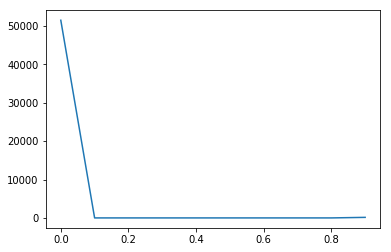

In [3]:
# Checking my leahy normalization for a random normal distribution
count_array = np.random.poisson(0.00328, 51648)
print(np.sum(count_array))
hist, bins = np.histogram(count_array)
plt.plot(bins[:-1], hist)
plt.figure()

1.994363773259963


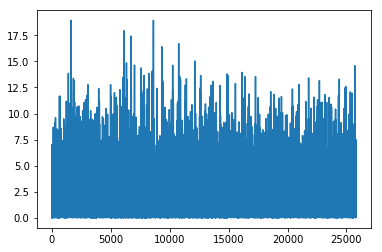

In [4]:
rand_psd = leahy_psd(count_array)
plt.plot(rand_psd)
print(np.mean(rand_psd))

[ 0.93181626 11.81204282]
2.344013251260117 2.352582906142931
1705 95.14864159530791
174


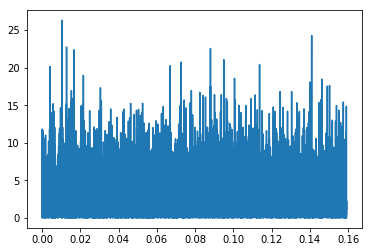

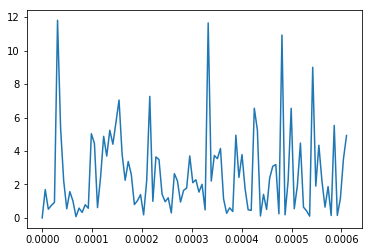

In [8]:
#Checking the powerspectrum of the actual light curve
lc_min = fits.getdata('source_bary_lcmint.fits')
counts = lc_min['net_rate']*3.14104
psd_mint = leahy_psd(counts)
freq = np.arange(len(psd_mint))/(51648*3.14104)
plt.plot(freq, psd_mint[:])
plt.figure()
plt.plot(freq[:100], psd_mint[:100])
print(psd_mint[[4,5]])
print(np.mean(psd_mint), np.var(psd_mint)**0.5)
print(np.argmax(psd_mint), 3.14104*51648/np.argmax(psd_mint))
print(len(np.where(psd_mint>=psd_mint[5])[0]))

163
9.86027367911307


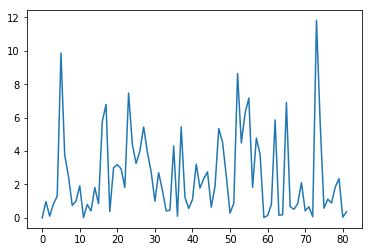

In [49]:
lc_min = fits.getdata('source_bary_lc1000.fits')
counts = lc_min['net_rate']*1000
print(len(counts))
psd_mint = leahy_psd(counts)
plt.plot(psd_mint[:])
print(psd_mint[5])

28
13.289198775389263


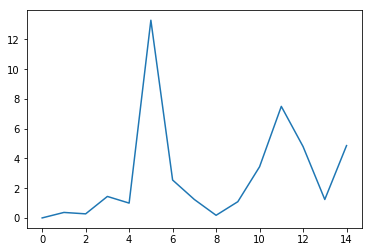

In [42]:
lc_min = fits.getdata('source_bary_lc.fits')
counts = lc_min['net_rate']*6000
print(len(counts))
psd_mint = leahy_psd(counts)
plt.plot(psd_mint[:])
print(psd_mint[5])